# House price

### 1 Data

In [3]:
import ctypes # beeper
import pandas as pd
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn import set_config
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, Ridge, SGDRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

set_config(transform_output='pandas')

# reading
train = pd.read_csv('data/kaggle_train.zip').set_index('Id').drop(
    columns=[
        'HouseStyle'
        , 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Functional'
        , 'GarageFinish', 'MiscFeature'])
test = pd.read_csv('data/kaggle_test.zip').set_index('Id').drop(
    columns=[
        'HouseStyle'
        , 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Functional'
        , 'GarageFinish', 'MiscFeature'])

# X and y creation
X_train = train.copy()
y = X_train.pop('SalePrice')
X_test = test.copy()
y = X_test.pop('SalePrice')

# # data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#, random_state=123)

ModuleNotFoundError: No module named 'catboost'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemodAdd 

In [ ]:
X_train.select_dtypes(exclude='number').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
X_categorical = X_train.select_dtypes(exclude='number').columns
X_cat_onehot = ['Neighborhood'] #X_train.select_dtypes(exclude='number').columns
X_cat_ordenc = X_categorical.copy().drop(X_cat_onehot)
X_numerical = X_train.select_dtypes(include='number').columns
print(X_categorical)
print('\n')
print(X_cat_ordenc)
print('\n')
print(X_cat_onehot)
print('\n')
print(X_numerical)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageQual', 'GarageCond', 'PavedDriv

In [ ]:
X_numerical_c0 = [
    'LotArea','LotFrontage','WoodDeckSF','ScreenPorch','OverallQual'
    ,'OverallCond','BsmtUnfSF','BsmtFullBath','BsmtHalfBath','FullBath'
    ,'KitchenAbvGr','TotRmsAbvGrd','GarageArea','OpenPorchSF','3SsnPorch'
    ,'MiscVal','YrSold']
X_numerical_mean = [
    'TotalBsmtSF','BedroomAbvGr','Fireplaces','PoolArea','GarageCars'
    ,'MSSubClass','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1'
    ,'BsmtFinSF2','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea'
    ,'HalfBath','GarageYrBlt','EnclosedPorch','MoSold']

In [ ]:
df.drop(columns=['SalePrice']).columns.sort_values().to_list() == df5.drop(columns=['Expensive']).columns.sort_values().to_list()

True

In [ ]:
((df[df.drop(columns=['SalePrice']).columns.sort_values()].replace({None: 0})) != (df5[df5.drop(columns=['Expensive']).columns.sort_values()].replace({None: 0}))).sum().sum()

348

In [ ]:
df.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1298,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,6,2006,New,Partial,140000
572,20,RL,60.0,7332,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,10,2006,WD,Abnorml,120000
78,50,RM,50.0,8635,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,0,1,2008,WD,Normal,127000
1197,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,11,2006,New,Partial,219210
782,60,RL,65.0,7153,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,7,2006,WD,Normal,175900
516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,9,2009,New,Partial,402861
1025,20,RL,NaN,15498,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,0,5,2008,COD,Abnorml,287000
72,20,RL,69.0,7599,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,0,6,2007,WD,Normal,129500
229,20,RL,70.0,8521,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,MnPrv,0,5,2010,WD,Normal,125000


In [ ]:
# profile = ProfileReport(df)

In [ ]:
# profile.to_file('data/report.html')
# profile

### 2 Preprocessing

#### 2.1 Sort categorical columns

##### Batch #01

In [ ]:
mszoning_order = ['RP', 'RL', 'RM', 'RH', 'FV', 'C (all)', 'A', 'I', 'NA']		
# MSZoning: Identifies the general zoning classification of the sale.
#     A	Agriculture
#     C	Commercial
#     FV	Floating Village Residential
#     I	Industrial
#     RH	Residential High Density
#     RL	Residential Low Density
#     RP	Residential Low Density Park 
#     RM	Residential Medium Density
X_train['MSZoning'].value_counts()

MSZoning
RL         920
RM         177
FV          53
RH          11
C (all)      7
Name: count, dtype: int64

In [ ]:
street_order = ['Pave', 'Grvl']
# Street: Type of road access to property
#        Grvl	Gravel	
#        Pave	Paved
df['Street'].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [ ]:
alley_order = ['Pave', 'Grvl', 'NA']
# Alley: Type of alley access to property
#        Grvl	Gravel
#        Pave	Paved
#        NA 	No alley access
df['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [ ]:
lotshape_order = ['Reg', 'IR1', 'IR2', 'IR3']
# LotShape: General shape of property
#        Reg	Regular	
#        IR1	Slightly irregular
#        IR2	Moderately Irregular
#        IR3	Irregular
df['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [ ]:
landcontour_order = ['Lvl', 'Bnk', 'HLS', 'Low']
# LandContour: Flatness of the property
#        Lvl	Near Flat/Level	
#        Bnk	Banked - Quick and significant rise from street grade to building
#        HLS	Hillside - Significant slope from side to side
#        Low	Depression
df['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

##### Batch #02

In [ ]:
utilities_order = ['AllPub', 'NoSewr', 'NoSeWa', 'ELO', 'NA']
# Utilities: Type of utilities available
#        AllPub	All public Utilities (E,G,W,& S)	
#        NoSewr	Electricity, Gas, and Water (Septic Tank)
#        NoSeWa	Electricity and Gas Only
#        ELO	Electricity only	
df['Utilities'].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [ ]:
lotconfig_order = ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3']
# LotConfig: Lot configuration
#        Inside	Inside lot
#        Corner	Corner lot
#        CulDSac	Cul-de-sac
#        FR2	Frontage on 2 sides of property
#        FR3	Frontage on 3 sides of property	
df['LotConfig'].value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

In [ ]:
landslope_order = ['Gtl', 'Mod', 'Sev']
# LandSlope: Slope of property
		
#        Gtl	Gentle slope
#        Mod	Moderate Slope	
#        Sev	Severe Slope
df['LandSlope'].value_counts()

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

In [ ]:
# Neighborhood

In [ ]:
condition1_order = ['PosA', 'PosN', 'Norm', 'Artery', 'Feedr', ['RRAn', 'RRAe'], ['RRNn', 'RRNe']]
condition1_order = ['PosA', 'PosN', 'Norm', 'Artery', 'Feedr', 'RRAn', 'RRAe', 'RRNn', 'RRNe']
# Condition1: Proximity to various conditions
#     Artery	Adjacent to arterial street
#     Feedr	Adjacent to feeder street	
#     Norm	Normal	
#     RRNn	Within 200' of North-South Railroad
#     RRAn	Adjacent to North-South Railroad
#     PosN	Near positive off-site feature--park, greenbelt, etc.
#     PosA	Adjacent to postive off-site feature
#     RRNe	Within 200' of East-West Railroad
#     RRAe	Adjacent to East-West Railroad
df['Condition1'].value_counts()

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

##### Batch #03

In [ ]:
condition2_order = ['PosA', 'PosN', 'Norm', 'Artery', 'Feedr', 'RRAn', 'RRAe', 'RRNn', 'RRNe']
# Condition2: Proximity to various conditions
#     Artery	Adjacent to arterial street
#     Feedr	Adjacent to feeder street	
#     Norm	Normal	
#     RRNn	Within 200' of North-South Railroad
#     RRAn	Adjacent to North-South Railroad
#     PosN	Near positive off-site feature--park, greenbelt, etc.
#     PosA	Adjacent to postive off-site feature
#     RRNe	Within 200' of East-West Railroad
#     RRAe	Adjacent to East-West Railroad
df['Condition2'].value_counts()

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

In [ ]:
bldgtype_order = ['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE', 'TwnhsI']
# BldgType: Type of dwelling
#        1Fam	Single-family Detached	
#        2FmCon	Two-family Conversion; originally built as one-family dwelling
#        Duplx	Duplex
#        TwnhsE	Townhouse End Unit
#        TwnhsI	Townhouse Inside Unit
df['BldgType'].value_counts()

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

In [ ]:
# HouseStyle

In [ ]:
roofstyle_order = ['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed']
# RoofStyle: Type of roof
#        Flat	Flat
#        Gable	Gable
#        Gambrel	Gabrel (Barn)
#        Hip	Hip
#        Mansard	Mansard
#        Shed	Shed
df['RoofStyle'].value_counts()

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64

In [ ]:
roofmatl_order = ['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl']
# RoofMatl: Roof material
#        ClyTile	Clay or Tile
#        CompShg	Standard (Composite) Shingle
#        Membran	Membrane
#        Metal	Metal
#        Roll	Roll
#        Tar&Grv	Gravel & Tar
#        WdShake	Wood Shakes
#        WdShngl	Wood Shingles
df['RoofMatl'].value_counts()

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

##### Batch #04

In [ ]:
# Exterior1st

In [ ]:
# Exterior2nd

In [ ]:
# MasVnrType

In [ ]:
exterqual_order = ['Ex', 'Gd', 'TA', 'Fa', 'Po']
# ExterQual: Evaluates the quality of the material on the exterior 
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        Po	Poor
df['ExterQual'].value_counts()

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

In [ ]:
extercond_order = ['Ex', 'Gd', 'TA', 'Fa', 'Po']
# ExterCond: Evaluates the present condition of the material on the exterior
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        Po	Poor
df['ExterCond'].value_counts()

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

##### Batch #05

In [ ]:
foundation_order = ['PConc', 'CBlock', 'BrkTil', 'Stone', 'Slab', 'Wood']
# Foundation: Type of foundation
#        BrkTil	Brick & Tile
#        CBlock	Cinder Block
#        PConc	Poured Contrete	
#        Slab	Slab
#        Stone	Stone
#        Wood	Wood
df['Foundation'].value_counts()

Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64

In [ ]:
bsmtqual_order = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
# BsmtQual: Evaluates the height of the basement
#        Ex	Excellent (100+ inches)	
#        Gd	Good (90-99 inches)
#        TA	Typical (80-89 inches)
#        Fa	Fair (70-79 inches)
#        Po	Poor (<70 inches
#        NA	No Basement
df['BsmtQual'].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [ ]:
bsmtcond_order = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
# BsmtCond: Evaluates the general condition of the basement
#        Ex	Excellent
#        Gd	Good
#        TA	Typical - slight dampness allowed
#        Fa	Fair - dampness or some cracking or settling
#        Po	Poor - Severe cracking, settling, or wetness
#        NA	No Basement
df['BsmtCond'].value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [ ]:
bsmtexposure_order = ['Gd', 'Av', 'Mn', 'No', 'NA']
# BsmtExposure: Refers to walkout or garden level walls
#        Gd	Good Exposure
#        Av	Average Exposure (split levels or foyers typically score average or above)	
#        Mn	Mimimum Exposure
#        No	No Exposure
#        NA	No Basement
df['BsmtExposure'].value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [ ]:
bsmtfintype1_order = ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA']
# BsmtFinType1: Rating of basement finished area
#        GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement
df['BsmtFinType1'].value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

##### Batch #06

In [ ]:
bsmtfintype2_order = ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA']
# BsmtFinType1: Rating of basement finished area
#        GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement
df['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [ ]:
heating_order = ['GasW', 'OthW', 'GasA', 'Floor', 'Wall', 'Grav']
# Heating: Type of heating
#     Floor	Floor Furnace
#     GasA	Gas forced warm air furnace
#     GasW	Gas hot water or steam heat
#     Grav	Gravity furnace	
#     OthW	Hot water or steam heat other than gas
#     Wall	Wall furnace
df['Heating'].value_counts()

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

In [ ]:
heatingqc_order = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
# HeatingQC: Heating quality and condition

#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        Po	Poor
df['HeatingQC'].value_counts()

HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64

In [ ]:
centralair_order = ['Y', 'N']
# CentralAir: Central air conditioning
#        N	No
#        Y	Yes
df['CentralAir'].value_counts()

CentralAir
Y    1365
N      95
Name: count, dtype: int64

In [ ]:
electrical_order = ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix', 'NA']
# Electrical: Electrical system
#        SBrkr	Standard Circuit Breakers & Romex
#        FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
#        FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
#        FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
#        Mix	Mixed
df['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

##### Batch #07

In [ ]:
kitchenqual_order = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
# KitchenQual: Kitchen quality
#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor
df['KitchenQual'].value_counts()

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

In [ ]:
# Functional

In [ ]:
fireplacequ_order = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
# FireplaceQu: Fireplace quality
#        Ex	Excellent - Exceptional Masonry Fireplace
#        Gd	Good - Masonry Fireplace in main level
#        TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
#        Fa	Fair - Prefabricated Fireplace in basement
#        Po	Poor - Ben Franklin Stove
#        NA	No Fireplace
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [ ]:
garagetype_order = ['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'NA']
# GarageType: Garage location
		
#        2Types	More than one type of garage
#        Attchd	Attached to home
#        Basment	Basement Garage
#        BuiltIn	Built-In (Garage part of house - typically has room above garage)
#        CarPort	Car Port
#        Detchd	Detached from home
#        NA	No Garage
df['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [ ]:
# GarageFinish

##### Batch #08

In [ ]:
garagequal_order = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
# GarageQual: Garage quality

#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor
#        NA	No Garage
df['GarageQual'].value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [ ]:
garagecond_order = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
# GarageCond: Garage condition
#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor
#        NA	No Garage
df['GarageCond'].value_counts()

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [ ]:
paveddrive_order = ['Y', 'P', 'N']
# PavedDrive: Paved driveway
#        Y	Paved 
#        P	Partial Pavement
#        N	Dirt/Gravel
df['PavedDrive'].value_counts()

PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64

In [ ]:
poolqc_order = ['Ex', 'Gd', 'TA', 'Fa', 'NA']
# PoolQC: Pool quality
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        NA	No Pool
df['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [ ]:
fence_order = ['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NA']
# Fence: Fence quality
#        GdPrv	Good Privacy
#        MnPrv	Minimum Privacy
#        GdWo	Good Wood
#        MnWw	Minimum Wood/Wire
#        NA	No Fence
df['Fence'].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

##### Batch #09

In [ ]:
# MiscFeature

In [ ]:
salestype_order = ['WD', 'CWD', 'VWD', 'New', 'COD', 'Con', 'ConLw', 'ConLI', 'ConLD', 'Oth', 'NA']
# SaleType: Type of sale
#        WD 	Warranty Deed - Conventional
#        CWD	Warranty Deed - Cash
#        VWD	Warranty Deed - VA Loan
#        New	Home just constructed and sold
#        COD	Court Officer Deed/Estate
#        Con	Contract 15% Down payment regular terms
#        ConLw	Contract Low Down payment and low interest
#        ConLI	Contract Low Interest
#        ConLD	Contract Low Down
#        Oth	Other
df['SaleType'].value_counts()

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

In [ ]:
salecondition_order = ['Normal', 'Abnorml', 'AdjLand', 'Alloca', 'Family', 'Partial']
# SaleCondition: Condition of sale
#        Normal	Normal Sale
#        Abnorml	Abnormal Sale -  trade, foreclosure, short sale
#        AdjLand	Adjoining Land Purchase
#        Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
#        Family	Sale between family members
#        Partial	Home was not completed when last assessed (associated with New Homes)
df['SaleCondition'].value_counts()

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

### 3 Transformers and regressors

In [ ]:
pipe_numerical_mean = Pipeline([('simple_imputer', SimpleImputer(strategy='mean'))])
pipe_numerical_constant = Pipeline([('simple_imputer', SimpleImputer(strategy='constant', fill_value=0))])
pipe_categorical = Pipeline([('simple_imputer', SimpleImputer(strategy='constant', fill_value='NA'))])

pipe_cat_ordenc = Pipeline([
    ('simple_imputer', SimpleImputer(strategy='constant', fill_value='NA'))
    , ('order_encoder', OrdinalEncoder(categories=[
        mszoning_order, street_order, alley_order, lotshape_order, landcontour_order # batch #01
        , utilities_order, lotconfig_order, landslope_order, condition1_order # batch #02
        , condition2_order, bldgtype_order, roofstyle_order, roofmatl_order # batch #03
        , exterqual_order, extercond_order # batch #04
        , foundation_order, bsmtqual_order, bsmtcond_order, bsmtexposure_order, bsmtfintype1_order # batch #05
        , bsmtfintype2_order, heating_order, heatingqc_order, centralair_order, electrical_order # batch #06
        , kitchenqual_order, fireplacequ_order, garagetype_order # batch #07
        , garagequal_order, garagecond_order, paveddrive_order, poolqc_order, fence_order # batch #08
        , salestype_order, salecondition_order])) # batch #09
])

pipe_cat_onehot = Pipeline([
    ('simple_imputer', SimpleImputer(strategy='constant', fill_value='NA'))
    , ('onehot_encoder', OneHotEncoder(sparse_output=False, drop='first'))
])

feature_selector_from_model = [
    ('features_decision_tree', DecisionTreeRegressor()),
    ('features_random_forest', RandomForestRegressor()),
    ('features_linear_regressor', LinearRegression()),
    ('features_logistic_regressor', LogisticRegression()),
    ('features_knn_regressor', KNeighborsRegressor())
]

regressors = [
    ('catboost', CatBoostRegressor())
    , ('decision_tree', DecisionTreeRegressor())
    , ('extra_trees', ExtraTreesRegressor())
    , ('gradient_boost', GradientBoostingRegressor())
    , ('knn', KNeighborsRegressor())
    , ('lgbmLGBM', LGBMRegressor())
    , ('linear', LinearRegression())
    , ('random_forest', RandomForestRegressor())
    , ('ridge', Ridge())
    , ('sgd', SGDRegressor())
    , ('svc', SVR())
    , ('xgboost', XGBRegressor())
]

transform_imputer = ColumnTransformer([
    ('num_scale_and_impute_mean', pipe_numerical_mean, X_numerical_mean)
    , ('num_scale_and_impute_constant', pipe_numerical_constant, X_numerical_c0)
    , ('cat_order', pipe_cat_ordenc, X_cat_ordenc)
    # , ('cat_onehot', pipe_cat_onehot, X_cat_onehot)
])

pipeline = Pipeline([
    ('preprocessor', transform_imputer)
    , ('standard_scaler', StandardScaler())
    , ('feature_selection', SelectFromModel(estimator=DecisionTreeRegressor(), threshold=None))
    , ('regressor', RandomForestRegressor())
]) # feature_selector and regressor as a placeholders
pipeline.fit(X_train, y_train)
# pipeline.predict(X_train)
print(pipeline.score(X_train, y_train))
pipeline

0.9772397056275924


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_scale_and_impute_mean',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer())]),
                                                  ['TotalBsmtSF',
                                                   'BedroomAbvGr', 'Fireplaces',
                                                   'PoolArea', 'GarageCars',
                                                   'MSSubClass', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'HalfBath...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('standard_scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=DecisionTreeRegressor())),
                ('regressor', RandomForestRegressor())])

### 4 Parameter search

#### 4.1 Grid

In [ ]:
str(type(model)).split('.')[-1].split("'")[0]

'XGBRegressor'

In [ ]:
param_search.best_score_

0.8125852751118998

In [ ]:
results = pd.DataFrame(columns=['model', 'r2_score'])
    # {
    #     'decision_tree': baseline_tree_r2
    #     , 'knn': baseline_knn_r2,
    #                          'rf': baseline_rf_r2},
    #                         index=['baseline'])
results.concat({'model': [str(type(model)).split('.')[-1].split("'")[0]], r2_score: param_search.best_score_})
results

AttributeError: 'DataFrame' object has no attribute 'concat'

In [ ]:
results.loc[param_search.best_score_, 'model']

results

AttributeError: 'list' object has no attribute 'loc'

In [ ]:
param_grid = []

# Add model-specific hyperparameters
for name, model in regressors:
    # if isinstance(model, CatBoostRegressor): # 60 fits, 0:01:45 h:mm:ss r2 0.86
    #     param_grid.append({
    #         'feature_selection__estimator': [CatBoostRegressor()]
    #         , 'regressor': [model]
    #         , 'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2]
    #         , 'regressor__iterations': [100, 300, 500]
    #     })
    # if isinstance(model, DecisionTreeRegressor): # 120 fits, 0:00:10 r2 0.76
    #     param_grid.append({
    #         'feature_selection__estimator': [DecisionTreeRegressor()]
    #         , 'regressor': [model]
    #         , 'regressor__criterion': ['squared_error', 'friedman_mse']
    #         , 'regressor__max_depth': [None, 10, 20]
    #         , 'regressor__min_samples_split': [2, 5]
    #         , 'regressor__min_samples_leaf': [1, 2]
    #     })
    if isinstance(model, ExtraTreesRegressor):
        param_grid.append({
            'regressor__n_estimators': [100, 300, 500]
            , 'regressor__max_depth': [None, 10, 20, 30]
            # , 'regressor__min_samples_split': [2, 5, 10]
            # , 'regressor__min_samples_leaf': [1, 2, 4]
            #, 'regressor__max_features': ['auto', 'sqrt', 'log2']
        })
    # elif isinstance(model, GradientBoostingRegressor):
    #     param_grid.append({
    #         'regressor': [model]
    #         , 'regressor__n_estimators': [100, 200, 300]
    #         , 'regressor__learning_rate': [0.1, 0.05]
    #         , 'regressor__max_depth': [3, 5, 7]
    #     })
    # elif isinstance(model, KNeighborsRegressor):
    #     param_grid.append({
    #         'regressor': [model]
    #         , 'regressor__n_neighbors': [3, 5, 7]
    #         , 'regressor__weights': ['uniform', 'distance']
    #     })
    # elif isinstance(model, LGBMRegressor):
    #     param_grid.append({
    #         'regressor': [model]
    #         , 'regressor__learning_rate': [0.01, 0.05, 0.1]
    #         , 'regressor__n_estimators': [100, 300, 500]
    #         , 'regressor__num_leaves': [20, 31, 50]
    #         , 'regressor__max_depth': [3, 5, 7, -1]
    #         , 'regressor__min_data_in_leaf': [20, 50, 100]
    #         , 'regressor__lambda_l1': [0, 1, 5]
    #         , 'regressor__lambda_l2': [0, 1, 5]
    #         , 'regressor__feature_fraction': [0.6, 0.8, 1.0]
    #         , 'regressor__bagging_fraction': [0.6, 0.8, 1.0]
    #         , 'regressor__bagging_freq': [0, 5, 10]
    #     })
    # elif isinstance(model, LinearRegression):
    #     param_grid.append({
    #         'regressor': [model]
    #         , 'regressor__fit_intercept': [True, False]
    #     })
    # elif isinstance(model, RandomForestRegressor):
    #     param_grid.append({
    #         'regressor': [model]
    #         , 'regressor__n_estimators': [100, 170] # range(100, 201, 10)
    #         , 'regressor__criterion': ['squared_error', 'poisson']
    #         , 'regressor__max_depth': [40, 60] # range(40, 66, 5)
    #         , 'regressor__min_samples_split': [2, 5] # range(1, 11, 1)
    #         , 'regressor__min_samples_leaf': [1, 2] #range(1, 5, 1)
    #         , 'regressor__min_weight_fraction_leaf': [0] #, 0.1, 1, 10]
    #         # , 'regressor__class_weight': ['balanced', None]
    #         # , 'regressor__ccp_alpha': [0, 0.000001, 0.00001]
    #         # , 'regressor__max_features': ['sqrt', 'log2']
    #     })
    # elif isinstance(model, Ridge):
    #     param_grid.append({
    #         'regressor': [model]
    #         , 'regressor__alpha': [0.1, 1.0, 10.0]
    #     })
    # elif isinstance(model, SGDRegressor):
    #     param_grid.append({
    #         'regressor__alpha': [0, 1e-5]
    #         , 'regressor__penalty': ['l2', 'l1', 'elasticnet']
    #         , 'regressor__max_iter': [1000, 3000, 5000, 10000]
    #         , 'regressor__loss': ['squared_error']
    #     })
    # elif isinstance(model, SVR):
    #     param_grid.append({
    #         'regressor__alpha': [0, 1e-5]
    #         , 'regressor__kernel': ['linear']
    #         , 'regressor__C': [0.1, 1, 10, 100]
    #         , 'regressor__epsilon': [0.01, 0.1, 0.5]
    #     })
    # elif isinstance(model, SVR):
    #     param_grid.append({
    #         'regressor__alpha': [0, 1e-5]
    #         , 'regressor__kernel': ['rbf']
    #         , 'regressor__C': [0.1, 1, 10, 100]
    #         , 'regressor__epsilon': [0.01, 0.1, 0.5]
    #         , 'regressor__gamma': ['scale', 'auto', 0.01, 0.1]
    #     })
    # elif isinstance(model, SVR):
    #     param_grid.append({
    #         'regressor__alpha': [0, 1e-5]
    #         , 'regressor__kernel': ['poly']
    #         , 'regressor__C': [0.1, 1, 10, 100]
    #         , 'regressor__epsilon': [0.01, 0.1, 0.5]
    #         , 'regressor__gamma': ['scale', 'auto', 0.01]
    #         , 'regressor__degree': [2, 3, 4]
    #         , 'regressor__coef0': [0.0, 0.1, 0.5]
    #     })
    # elif isinstance(model, XGBRegressor):
    #     param_grid.append({
    #         'regressor__n_estimators': [100, 200, 300]
    #         , 'regressor__max_depth': [3, 5, 7]
    #         , 'regressor__learning_rate': [0.01, 0.05, 0.1]
    #         , 'regressor__subsample': [0.7, 0.8, 1]
    #         , 'regressor__colsample_bytree': [0.7, 0.8, 1]
    #         , 'regressor__gamma': [0, 0.1, 0.5]
    #         , 'regressor__min_child_weight': [1, 3, 5]
    #     })

param_grid

[{'regressor__n_estimators': [100, 300, 500],
  'regressor__max_depth': [None, 10, 20, 30]}]

#### 4.2 Search

In [ ]:
# define GridSearchCV
param_search = GridSearchCV(
    pipeline
    , param_grid
    , scoring='r2'
    , cv=5
    , verbose=1)
param_search.fit(X_train, y_train)

print(f'Best model: {param_search.best_estimator_}')
print(f'Best score: {param_search.best_score_}')
print(f'Best parameters: {param_search.best_params_}')

# y_pred = param_search.best_estimator_.predict(X_train)
_ = ctypes.windll.kernel32.Beep(1000, 100)
# print(f'Accuracy: {accuracy_score(y_train, y_pred):.4f}')
# param_search.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_scale_and_impute_mean',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer())]),
                                                  ['TotalBsmtSF',
                                                   'BedroomAbvGr', 'Fireplaces',
                                                   'PoolArea', 'GarageCars',
                                                   'MSSubClass', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                          

In [ ]:
pd.DataFrame(param_search.cv_results_).sort_values(by='rank_test_score').head(5)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor,param_regressor__alpha,param_regressor__loss,param_regressor__max_iter,param_regressor__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,0.050831,0.007818,0.019638,0.002499,SGDRegressor(),0.00001,squared_error,1000,elasticnet,"{'regressor': SGDRegressor(), 'regressor__alph...",0.438623,0.830301,0.834989,0.817270,0.803000,0.744837,0.153511,1
3,0.052253,0.009004,0.021902,0.003309,SGDRegressor(),0,squared_error,3000,l2,"{'regressor': SGDRegressor(), 'regressor__alph...",0.418144,0.839323,0.820817,0.820608,0.824341,0.744647,0.163396,2
20,0.056696,0.006490,0.021432,0.003336,SGDRegressor(),0.00001,squared_error,5000,elasticnet,"{'regressor': SGDRegressor(), 'regressor__alph...",0.454462,0.816889,0.830690,0.792128,0.822600,0.743354,0.145019,3
23,0.049941,0.005085,0.019580,0.002994,SGDRegressor(),0.00001,squared_error,10000,elasticnet,"{'regressor': SGDRegressor(), 'regressor__alph...",0.421244,0.826046,0.815303,0.832918,0.819713,0.743045,0.161010,4
4,0.055098,0.008709,0.022702,0.003829,SGDRegressor(),0,squared_error,3000,l1,"{'regressor': SGDRegressor(), 'regressor__alph...",0.454686,0.829258,0.797140,0.822119,0.811816,0.743004,0.144563,5


In [ ]:
from pprint import pprint

pprint(param_search.cv_results_)

{'mean_fit_time': array([0.16095338, 0.1596333 , 0.1006084 , 0.06260414]),
 'mean_score_time': array([0.02703352, 0.02262917, 0.02367716, 0.        ]),
 'mean_test_score': array([-0.0960598 , -0.12537669, -0.09697116,         nan]),
 'param_regressor': masked_array(data=[LGBMRegressor(), LGBMRegressor(), LGBMRegressor(),
                   LGBMRegressor()],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
 'param_regressor__boosting_type': masked_array(data=['gbdt', 'dart', 'goss', 'rf'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'regressor': LGBMRegressor(), 'regressor__boosting_type': 'gbdt'},
            {'regressor': LGBMRegressor(), 'regressor__boosting_type': 'dart'},
            {'regressor': LGBMRegressor(), 'regressor__boosting_type': 'goss'},
            {'regressor': LGBMRegressor(), 'regressor__boosting_type': 'rf'}],
 'rank_test_score': array([1, 3, 2, 4]),

ValueError: could not convert string to float: 'RL'

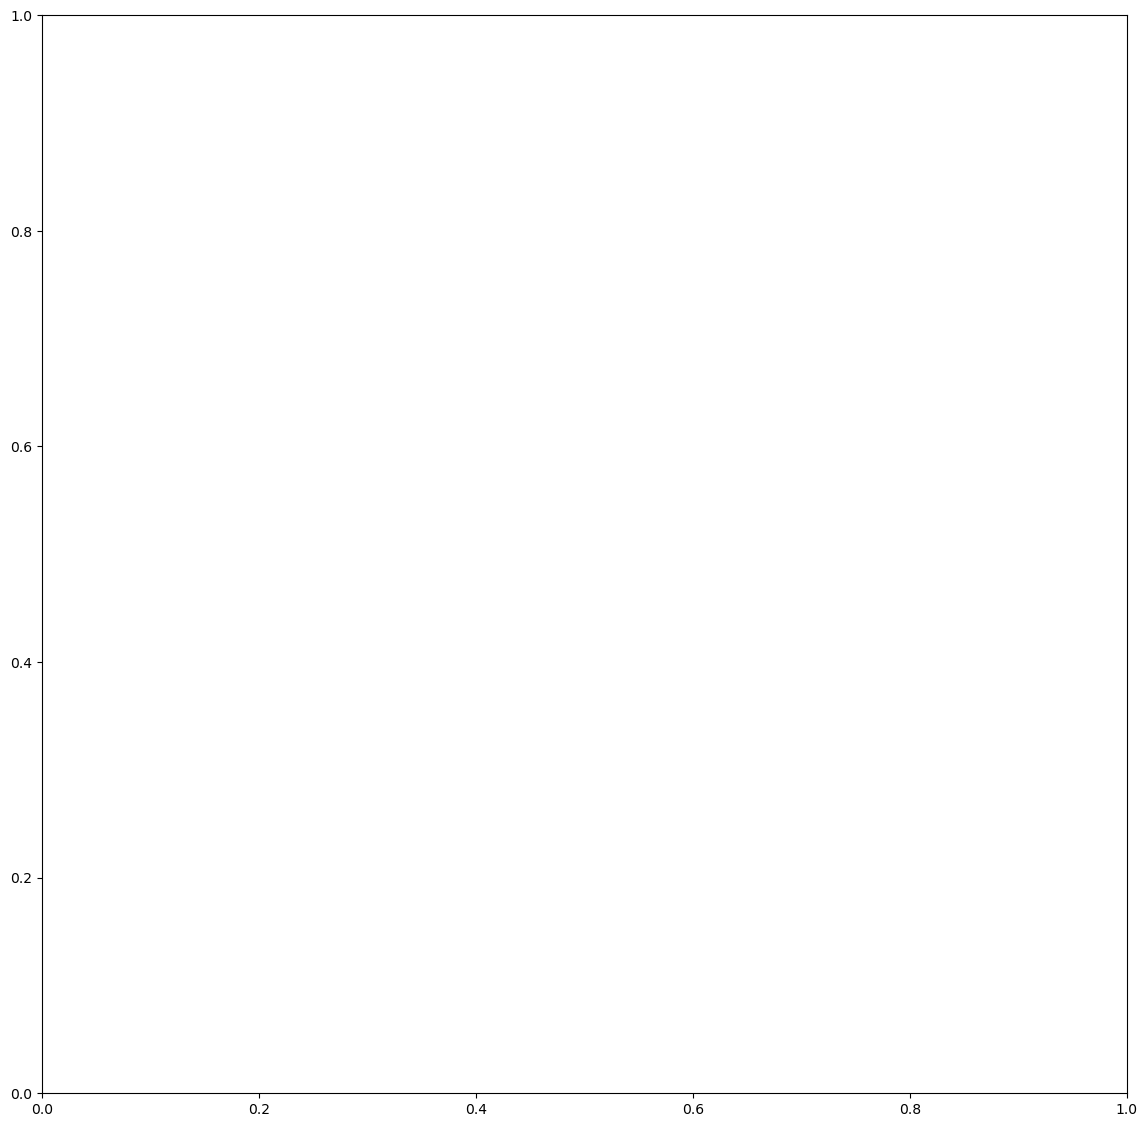

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(df.corr());